## Observations and Insights

## Dependencies and starter code

In [37]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)
combo_df = mouse_df.merge(study_df)
combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [6]:
# Create groupby object to perform calculations on the data set.
drug_group = combo_df.groupby('Drug Regimen')

# Store values of calculations into their own variables.
drug_mean = drug_group['Tumor Volume (mm3)'].mean()
drug_med = drug_group['Tumor Volume (mm3)'].median()
drug_var = drug_group['Tumor Volume (mm3)'].var()
drug_std = drug_group['Tumor Volume (mm3)'].std()
drug_sem = drug_group['Tumor Volume (mm3)'].sem()


In [7]:
# Create the DataFrame with correct labels.
summary_df = pd.DataFrame({'Drug Mean': drug_mean,
                          'Drug Median': drug_med,
                          'Drug Variance': drug_var,
                          'Drug STD': drug_std,
                          'Drug SEM': drug_sem})
summary_df

,Drug Mean,Drug Median,Drug Variance,Drug STD,Drug SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

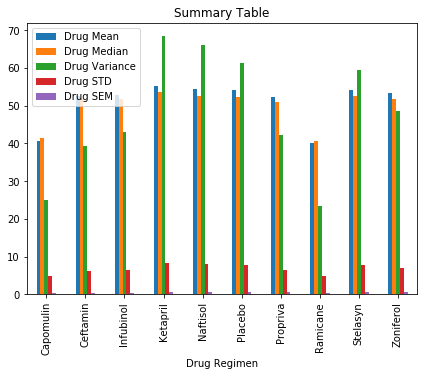

In [9]:
summary_df.plot(kind='bar', title='Summary Table', figsize=(7,5))

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

Text(0.5, 1.0, 'Summary Table')

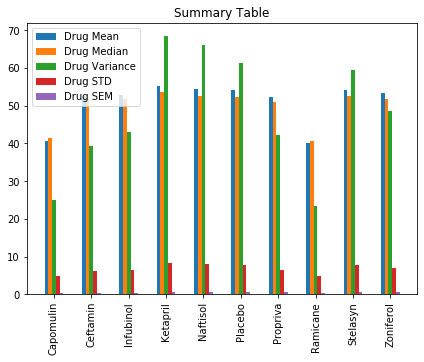

In [11]:
x_axis = np.arange(len(summary_df))

tick_locations = [value for value in x_axis]

plt.figure(figsize=(7,5))
plt.bar(x_axis-.2, summary_df["Drug Mean"], color='tab:blue', width=0.1, align="center", label= 'Drug Mean')
plt.bar(x_axis-.1, summary_df["Drug Median"], color='tab:orange', width=0.1, align='center', label= 'Drug Median')
plt.bar(x_axis, summary_df["Drug Variance"], color='tab:green', width=0.1, align='center', label='Drug Variance')
plt.bar(x_axis+.1, summary_df["Drug STD"], color='tab:red', width=0.1, align='center', label='Drug STD')
plt.bar(x_axis+.2, summary_df["Drug SEM"], color='tab:purple', width=0.1, align='center', label='Drug SEM')

plt.xticks(tick_locations, summary_df.index, rotation="vertical")
plt.legend()

plt.title("Summary Table")

## Pie plots

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

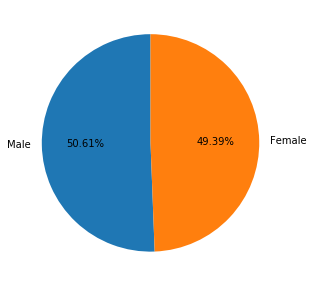

In [13]:
gender_count = combo_df['Sex'].value_counts()

pie_count = gender_count.plot.pie(label=(''), figsize=(5,5),autopct='%1.2f%%', startangle=90)

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

([<matplotlib.patches.Wedge at 0x2d0b5bc7848>,
 [Text(-1.0997996703027118, -0.020992503472585362, 'Male'),
  Text(1.0997996703027118, 0.020992503472585713, 'Female')],
 [Text(-0.5998907292560246, -0.011450456439592015, '50.61%'),
  Text(0.5998907292560246, 0.011450456439592206, '49.39%')])

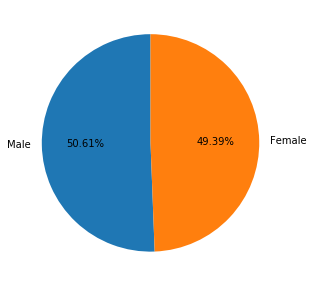

In [15]:
plt.figure(figsize=(5,5))
label = combo_df['Sex'].unique()
plt.pie(gender_count, labels=label, autopct='%1.2f%%', startangle=90)

## Quartiles, outliers and boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [17]:
tumor = combo_df.loc[combo_df['Timepoint'] == 20]
tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
4,k403,Ramicane,Male,21,16,20,32.997729,1
14,s185,Capomulin,Female,3,17,20,36.866876,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
34,m601,Capomulin,Male,22,17,20,34.255732,1
44,g791,Ramicane,Male,11,16,20,41.211897,0
...,...,...,...,...,...,...,...,...
1840,y769,Ceftamin,Female,6,27,20,55.025724,2
1850,y865,Ceftamin,Male,23,26,20,52.361982,1
1867,z581,Infubinol,Female,24,25,20,51.807944,2
1877,z795,Naftisol,Female,13,29,20,53.280657,1


In [18]:
tumor = combo_df.loc[combo_df['Timepoint'] == 20]
tumor_group = tumor.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_mean = tumor_group.mean()
tumor_mean

Drug Regimen
Capomulin    40.716325
Ceftamin     52.157049
Infubinol    53.197691
Ketapril     54.920935
Naftisol     53.644087
Placebo      54.364417
Propriva     53.346737
Ramicane     40.238325
Stelasyn     53.970080
Zoniferol    53.170334
Name: Tumor Volume (mm3), dtype: float64

In [19]:
tumor_table = tumor.pivot_table(index=['Drug Regimen', 'Mouse ID'])

new_table = tumor_table.drop(['Zoniferol', 'Stelasyn', 'Ramicane', 'Propriva', 'Placebo', 'Naftisol'])

In [20]:
capomulin = new_table['Tumor Volume (mm3)']['Capomulin']
ceftamin = new_table['Tumor Volume (mm3)']['Ceftamin']
infubinol = new_table['Tumor Volume (mm3)']['Infubinol']
ketapril = new_table['Tumor Volume (mm3)']['Ketapril']

In [21]:
capq1 = np.percentile(capomulin, 25)
capq1

38.2407459

In [22]:
capq3 = np.percentile(capomulin, 75)
capq3

43.596783175

In [23]:
capiqr = (capq3 - capq1)
capiqr

5.3560372749999985

In [24]:
cap_lower_boundary = capq1 - (1.5 * capiqr)
cap_lower_boundary

30.206689987500003

In [25]:
cap_upper_boundary = capq3 + (1.5 * capiqr)
cap_upper_boundary

51.63083908749999

In [26]:
capomulin[capomulin <= cap_lower_boundary]

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [27]:
capomulin[capomulin >= cap_upper_boundary]

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

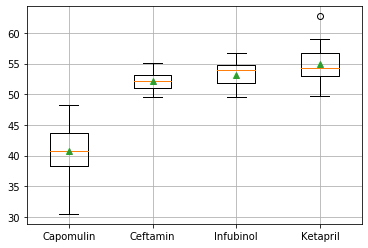

In [29]:
fig, ax = plt.subplots()
label = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril']
ax.boxplot([capomulin, ceftamin, infubinol, ketapril], showmeans=True, labels=label)

plt.grid()
plt.show()

## Line and scatter plots

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = combo_df[combo_df['Drug Regimen'] == 'Capomulin']

In [52]:
s185_df = combo_df[combo_df['Mouse ID'] == 's185']
s185_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 1.0, 'Capomulin Treatment')

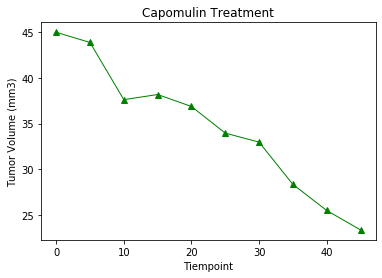

In [53]:
x_axis = s185_df['Timepoint']
y_axis = s185_df['Tumor Volume (mm3)']
s185, = plt.plot(x_axis, y_axis, marker="^",color='green', linewidth=1, label='s185')
plt.xlabel('Tiempoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment')

In [54]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [55]:
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


The r-squared is: 0.5256995552077166


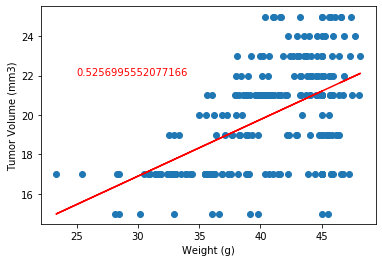

In [60]:
y_values = cap_df['Weight (g)']
x_values = cap_df['Tumor Volume (mm3)']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(rvalue, (25,22), color='red' )
print(f"The r-squared is: {rvalue}")

plt.show()

In [57]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [62]:
calc = combo_df[combo_df['Drug Regimen'] == 'Capomulin']
calc.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [64]:
print("The correlation coefficient" + str(slope * calc['Tumor Volume (mm3)'].mean() + int) + ".")

TypeError: unsupported operand type(s) for +: 'float' and 'type'

In [84]:
corr = calc[['Weight (g)', 'Tumor Volume (mm3)']]
corr['Weight (g)'].corr(corr['Tumor Volume (mm3)'])

0.5256995552077166